In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from random import uniform
import math

In [31]:
def inp(w, x, b):
    return w * x + b


def out(t):
    return np.tanh(t)


def neuron(w, x, b):
    return out(inp(w, x, b))


def tanh_deriv(x):
    t = np.tanh(x)**2
    return 1.0 - t


def neuron_der_b(w, x, b):
    return tanh_deriv(inp(w, x, b))
  
    
def neuron_der_w(w, x, b):
    return tanh_deriv(inp(w, x, b)) * x


def pred(x, w11_x, w11_b, w21_x, w2_b):
    return (w21_x * neuron(w11_x, x, w11_b) + w2_b)


def func(x):
    return np.sin(math.pi / 2 * x)


def loss(x, w11_x, w11_b, w21_x, w2_b):
    l = 0
    for item in x:
        f = func(item)
        p = pred(item, w11_x, w11_b, w21_x, w2_b)
        sq = (p - func(item)) * (p - func(item))
        l = l + sq
    print "Loss = " + str(l)
    return l


def loss_deriv_w2_b(x, w11_x, w11_b, w21_x, w2_b):
    l = 0
    for item in x:
        f = func(item)
        p = pred(item, w11_x, w11_b, w21_x, w2_b)
        sq = 2 * (p - func(item))
        l = l + sq
#    print "Loss_deriv_w2_b = " + str(l)
    return l


def loss_deriv_w21_x(x, w11_x, w11_b, w21_x, w2_b):
    l = 0
    for item in x:
        f = func(item)
        p = pred(item, w11_x, w11_b, w21_x, w2_b)
        sq = 2 * (p - func(item)) * neuron(w11_x, item, w11_b)
        l = l + sq
#    print "Loss_deriv_w21_x = " + str(l)
    return l    



def loss_deriv_w11_x(x, w11_x, w11_b, w21_x, w2_b):
    l = 0
    for item in x:
        f = func(item)
        p = pred(item, w11_x, w11_b, w21_x, w2_b)
        sq = 2 * (p - func(item)) * w21_x * neuron_der_w(w11_x, item, w11_b)
        l = l + sq
#    print "Loss_deriv_w21_x = " + str(l)
    return l    


def loss_deriv_w11_b(x, w11_x, w11_b, w21_x, w2_b):
    l = 0
    for item in x:
        f = func(item)
        p = pred(item, w11_x, w11_b, w21_x, w2_b)
        sq = 2 * (p - func(item)) * w21_x * neuron_der_b(w11_x, item, w11_b)
        l = l + sq
#    print "Loss_deriv_w11_b = " + str(l)
    return l



In [35]:
epochs = 1000

step_lin_w_x = 0.001
step_lin_w_b = 0.01

#x = np.arange(0, math.pi, 0.05)
x = np.arange(0, 1.05, 0.05)
print x
y = func(x)
print y

w11_x = uniform(0, 1)
w11_b = uniform(0, 1)

w12_x = uniform(0, 1)
w12_b = uniform(0, 1)

w21_x = uniform(0, 1)
w22_x = uniform(0, 1)

w2_b  = uniform(0, 1)


[ 0.    0.05  0.1   0.15  0.2   0.25  0.3   0.35  0.4   0.45  0.5   0.55
  0.6   0.65  0.7   0.75  0.8   0.85  0.9   0.95  1.  ]
[ 0.          0.0784591   0.15643447  0.23344536  0.30901699  0.38268343
  0.4539905   0.52249856  0.58778525  0.64944805  0.70710678  0.76040597
  0.80901699  0.85264016  0.89100652  0.92387953  0.95105652  0.97236992
  0.98768834  0.99691733  1.        ]


<IPython.core.display.Javascript object>


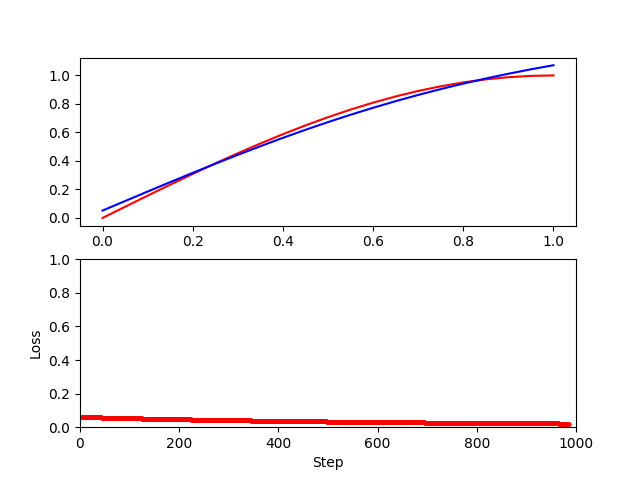

(0, 1)

In [38]:
#fig,(ax1, ax2, ax3, ax4) = plt.subplots(4,1, sharex = False, sharey = False)

fig,(ax1, ax2) = plt.subplots(2,1, sharex = False, sharey = False)

ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_xlim(0, 1.05)
ax1.set_ylim(0, 2)
ax1.set_xlabel("X")
ax1.plot(x, y, color = 'r')

ax2.set_xlabel("Step")
ax2.set_ylabel("Loss")
ax2.set_xlim(0, epochs)
ax2.set_ylim(0, 1)



In [ ]:
for i in range(epochs):
    l = loss(x, w11_x, w11_b, w21_x, w2_b)
    ax2.scatter(i, l, color = 'r', s=5)
    
    w21_x_new = w21_x - step_lin_w_x * loss_deriv_w21_x(x, w11_x, w11_b, w21_x, w2_b)

    w2_b_new = w2_b - step_lin_w_b * loss_deriv_w2_b(x, w11_x, w11_b, w21_x, w2_b)

    w11_x_new = w11_x - step_lin_w_x * loss_deriv_w11_x(x, w11_x, w11_b, w21_x, w2_b)
    w11_b_new = w11_b - step_lin_w_b * loss_deriv_w11_b(x, w11_x, w11_b, w21_x, w2_b)
        
    w21_x = w21_x_new
    w2_b = w2_b_new
    
    w11_x = w11_x_new
    w11_b = w11_b_new
 
    print "w11_x = " + str(w11_x)
    print "w11_b = " + str(w11_b)
    print "w21_x = " + str(w21_x)
    print "w2_b = " + str(w2_b)
    
    z = pred(x, w11_x, w11_b, w21_x, w2_b)
    ax1.clear()
    #print x
    #print y
    ax1.plot(x, y, color = 'r')
    ax1.plot(x, z, color = 'b')
    
    fig.canvas.draw()
    


Loss = 0.0614591865729
w11_x = 0.892046820693
w11_b = -0.222140292274
w21_x = 1.22795293654
w2_b = 0.377857681216
Loss = 0.0613671989012
w11_x = 0.892262974352
w11_b = -0.221840227797
w21_x = 1.22807267252
w2_b = 0.377392045418
Loss = 0.0612755346876
w11_x = 0.892478567234
w11_b = -0.221539709111
w21_x = 1.22819191812
w2_b = 0.376926291329
Loss = 0.061184190678
w11_x = 0.892693604308
w11_b = -0.221238744387
w21_x = 1.22831067753
w2_b = 0.376460425178
Loss = 0.0610931636685
w11_x = 0.8929080905
w11_b = -0.220937341742
w21_x = 1.22842895492
w2_b = 0.375994453156
Loss = 0.0610024505047
w11_x = 0.893122030696
w11_b = -0.220635509244
w21_x = 1.22854675444
w2_b = 0.37552838142
Loss = 0.0609120480803
w11_x = 0.893335429744
w11_b = -0.220333254907
w21_x = 1.22866408019
w2_b = 0.375062216088
Loss = 0.0608219533371
w11_x = 0.893548292449
w11_b = -0.220030586695
w21_x = 1.22878093627
w2_b = 0.374595963244
Loss = 0.0607321632638
w11_x = 0.893760623579
w11_b = -0.219727512517
w21_x = 1.22889732671


Loss = 0.0553618565022
w11_x = 0.906806492077
w11_b = -0.199180795848
w21_x = 1.2357286274
w2_b = 0.343443501597
Loss = 0.0552875296309
w11_x = 0.906992193672
w11_b = -0.198865983856
w21_x = 1.23582161976
w2_b = 0.342983616115
Loss = 0.0552133813502
w11_x = 0.907177606946
w11_b = -0.198551191373
w21_x = 1.2359143598
w2_b = 0.342523977513
Loss = 0.0551394105985
w11_x = 0.907362734457
w11_b = -0.198236423126
w21_x = 1.23600684987
w2_b = 0.342064589451
Loss = 0.0550656163291
w11_x = 0.907547578738
w11_b = -0.197921683804
w21_x = 1.23609909226
w2_b = 0.341605455555
Loss = 0.0549919975099
w11_x = 0.907732142298
w11_b = -0.197606978053
w21_x = 1.23619108927
w2_b = 0.341146579422
Loss = 0.0549185531232
w11_x = 0.907916427622
w11_b = -0.19729231048
w21_x = 1.23628284318
w2_b = 0.340687964615
Loss = 0.0548452821655
w11_x = 0.908100437169
w11_b = -0.196977685653
w21_x = 1.23637435622
w2_b = 0.340229614667
Loss = 0.0547721836472
w11_x = 0.908284173375
w11_b = -0.196663108098
w21_x = 1.23646563064

Loss = 0.0503522526824
w11_x = 0.919739667725
w11_b = -0.176503141021
w21_x = 1.24197878891
w2_b = 0.310714773499
Loss = 0.0502888715654
w11_x = 0.919909686294
w11_b = -0.176199833332
w21_x = 1.24205836201
w2_b = 0.310280637893
Loss = 0.0502256183632
w11_x = 0.920079548511
w11_b = -0.175896793943
w21_x = 1.24213780725
w2_b = 0.309846938258
Loss = 0.0501624926268
w11_x = 0.920249255553
w11_b = -0.17559402506
w21_x = 1.24221712579
w2_b = 0.309413676189
Loss = 0.0500994939111
w11_x = 0.920418808584
w11_b = -0.175291528859
w21_x = 1.24229631877
w2_b = 0.308980853258
Loss = 0.0500366217748
w11_x = 0.920588208753
w11_b = -0.17498930749
w21_x = 1.24237538734
w2_b = 0.308548471012
Loss = 0.0499738757807
w11_x = 0.920757457197
w11_b = -0.174687363073
w21_x = 1.24245433261
w2_b = 0.308116530978
Loss = 0.0499112554952
w11_x = 0.920926555039
w11_b = -0.1743856977
w21_x = 1.24253315572
w2_b = 0.307685034655
Loss = 0.0498487604886
w11_x = 0.92109550339
w11_b = -0.174084313439
w21_x = 1.24261185775
w

Loss = 0.0460371373703
w11_x = 0.931800320992
w11_b = -0.155175807137
w21_x = 1.24751217043
w2_b = 0.280244049729
Loss = 0.0459821018749
w11_x = 0.931961300154
w11_b = -0.154896312794
w21_x = 1.24758481387
w2_b = 0.279844605168
Loss = 0.0459271687717
w11_x = 0.932122180192
w11_b = -0.154617184202
w21_x = 1.24765738817
w2_b = 0.279445659162
Loss = 0.0458723377803
w11_x = 0.932282961573
w11_b = -0.154338421947
w21_x = 1.24772989382
w2_b = 0.279047211933
Loss = 0.0458176086215
w11_x = 0.93244364476
w11_b = -0.154060026604
w21_x = 1.24780233133
w2_b = 0.278649263686
Loss = 0.0457629810176
w11_x = 0.932604230208
w11_b = -0.153781998728
w21_x = 1.24787470119
w2_b = 0.278251814615
Loss = 0.045708454692
w11_x = 0.932764718365
w11_b = -0.153504338859
w21_x = 1.24794700389
w2_b = 0.277854864901
Loss = 0.045654029369
w11_x = 0.932925109676
w11_b = -0.153227047521
w21_x = 1.24801923993
w2_b = 0.277458414708
Loss = 0.0455997047747
w11_x = 0.933085404578
w11_b = -0.152950125225
w21_x = 1.24809140976

Loss = 0.0422241496199
w11_x = 0.943469074605
w11_b = -0.135502812446
w21_x = 1.25272762391
w2_b = 0.252032029055
Loss = 0.0421760021041
w11_x = 0.943623641425
w11_b = -0.135251078039
w21_x = 1.25279617959
w2_b = 0.251669311172
Loss = 0.0421279389307
w11_x = 0.943778130479
w11_b = -0.134999717791
w21_x = 1.25286469031
w2_b = 0.251307078288
Loss = 0.0420799598864
w11_x = 0.943932541919
w11_b = -0.134748731438
w21_x = 1.25293315623
w2_b = 0.250945329907
Loss = 0.0420320647587
w11_x = 0.944086875894
w11_b = -0.134498118714
w21_x = 1.25300157755
w2_b = 0.250584065522
Loss = 0.0419842533355
w11_x = 0.944241132553
w11_b = -0.134247879343
w21_x = 1.25306995445
w2_b = 0.250223284624
Loss = 0.0419365254056
w11_x = 0.944395312042
w11_b = -0.133998013043
w21_x = 1.25313828709
w2_b = 0.249862986697
Loss = 0.0418888807584
w11_x = 0.944549414502
w11_b = -0.133748519524
w21_x = 1.25320657565
w2_b = 0.249503171219
Loss = 0.041841319184
w11_x = 0.944703440074
w11_b = -0.13349939849
w21_x = 1.2532748203

Loss = 0.0388759628078
w11_x = 0.954704475815
w11_b = -0.117861251877
w21_x = 1.25768855542
w2_b = 0.226462968336
Loss = 0.0388335220515
w11_x = 0.954853572168
w11_b = -0.117636131071
w21_x = 1.25775413698
w2_b = 0.226134495428
Loss = 0.0387911515465
w11_x = 0.955002597154
w11_b = -0.117411351019
w21_x = 1.25781968163
w2_b = 0.225806459342
Loss = 0.0387488511239
w11_x = 0.955151550814
w11_b = -0.117186911138
w21_x = 1.25788518941
w2_b = 0.225478859331
Loss = 0.0387066206155
w11_x = 0.955300433186
w11_b = -0.116962810845
w21_x = 1.25795066039
w2_b = 0.225151694644
Loss = 0.0386644598534
w11_x = 0.955449244311
w11_b = -0.116739049557
w21_x = 1.25801609462
w2_b = 0.224824964529
Loss = 0.0386223686702
w11_x = 0.955597984226
w11_b = -0.116515626686
w21_x = 1.25808149214
w2_b = 0.224498668236
Loss = 0.0385803468993
w11_x = 0.955746652969
w11_b = -0.116292541644
w21_x = 1.258146853
w2_b = 0.22417280501
Loss = 0.0385383943744
w11_x = 0.955895250577
w11_b = -0.116069793841
w21_x = 1.25821217725

Loss = 0.0359524549189
w11_x = 0.965402855466
w11_b = -0.102285337756
w21_x = 1.26238143672
w2_b = 0.203585060814
Loss = 0.0359147297791
w11_x = 0.965546815436
w11_b = -0.102083490414
w21_x = 1.26244441621
w2_b = 0.203286470969
Loss = 0.0358770638503
w11_x = 0.965690705761
w11_b = -0.101881938836
w21_x = 1.26250736086
w2_b = 0.202988262221
Loss = 0.0358394569979
w11_x = 0.965834526455
w11_b = -0.101680682398
w21_x = 1.26257027068
w2_b = 0.202690433817
Loss = 0.0358019090879
w11_x = 0.965978277531
w11_b = -0.101479720478
w21_x = 1.26263314568
w2_b = 0.202392985005
Loss = 0.0357644199865
w11_x = 0.966121959005
w11_b = -0.101279052454
w21_x = 1.26269598587
w2_b = 0.202095915035
Loss = 0.0357269895607
w11_x = 0.966265570889
w11_b = -0.101078677703
w21_x = 1.26275879127
w2_b = 0.201799223156
Loss = 0.0356896176774
w11_x = 0.966409113197
w11_b = -0.100878595605
w21_x = 1.26282156188
w2_b = 0.20150290862
Loss = 0.0356523042042
w11_x = 0.966552585945
w11_b = -0.100678805538
w21_x = 1.262884297

Loss = 0.0333799739018
w11_x = 0.975590773501
w11_b = -0.0884718178632
w21_x = 1.26682743776
w2_b = 0.183016845492
Loss = 0.0333461914931
w11_x = 0.975729754059
w11_b = -0.0882897151766
w21_x = 1.26688792978
w2_b = 0.182743834578
Loss = 0.0333124595903
w11_x = 0.975868665985
w11_b = -0.0881078653974
w21_x = 1.26694838749
w2_b = 0.182471153459
Loss = 0.0332787780851
w11_x = 0.976007509294
w11_b = -0.0879262679684
w21_x = 1.26700881088
w2_b = 0.182198801468
Loss = 0.0332451468698
w11_x = 0.976146284004
w11_b = -0.0877449223338
w21_x = 1.26706919996
w2_b = 0.181926777946
Loss = 0.0332115658371
w11_x = 0.976284990131
w11_b = -0.0875638279388
w21_x = 1.26712955473
w2_b = 0.181655082229
Loss = 0.0331780348797
w11_x = 0.97642362769
w11_b = -0.08738298423
w21_x = 1.26718987521
w2_b = 0.18138371366
Loss = 0.033144553891
w11_x = 0.976562196699
w11_b = -0.0872023906551
w21_x = 1.26725016139
w2_b = 0.181112671581
Loss = 0.0331111227643
w11_x = 0.976700697173
w11_b = -0.0870220466632
w21_x = 1.2673

Loss = 0.031070601734
w11_x = 0.985423014763
w11_b = -0.0759749244644
w21_x = 1.27109549544
w2_b = 0.164164965687
Loss = 0.031040197476
w11_x = 0.985557101101
w11_b = -0.0758096826004
w21_x = 1.27115353234
w2_b = 0.163914092768
Loss = 0.0310098366962
w11_x = 0.985691120234
w11_b = -0.0756446567875
w21_x = 1.27121153542
w2_b = 0.163663505688
Loss = 0.0309795193069
w11_x = 0.985825072184
w11_b = -0.0754798465608
w21_x = 1.27126950469
w2_b = 0.163413203891
Loss = 0.0309492452207
w11_x = 0.985958956977
w11_b = -0.0753152514571
w21_x = 1.27132744015
w2_b = 0.163163186823
Loss = 0.0309190143503
w11_x = 0.986092774635
w11_b = -0.075150871014
w21_x = 1.27138534181
w2_b = 0.162913453931
Loss = 0.0308888266086
w11_x = 0.986226525184
w11_b = -0.0749867047706
w21_x = 1.27144320968
w2_b = 0.162664004663
Loss = 0.030858681909
w11_x = 0.986360208646
w11_b = -0.0748227522674
w21_x = 1.27150104377
w2_b = 0.16241483847
Loss = 0.0308285801649
w11_x = 0.986493825047
w11_b = -0.0746590130458
w21_x = 1.2715

Loss = 0.0289876344186
w11_x = 0.994906971189
w11_b = -0.0646033049283
w21_x = 1.27518830569
w2_b = 0.146801029567
Loss = 0.0289601501628
w11_x = 0.995036285203
w11_b = -0.0644525048614
w21_x = 1.27524393439
w2_b = 0.146569400374
Loss = 0.0289327036483
w11_x = 0.995165533962
w11_b = -0.064301890517
w21_x = 1.27529953008
w2_b = 0.146338020558
Loss = 0.0289052948031
w11_x = 0.995294717496
w11_b = -0.0641514615166
w21_x = 1.27535509279
w2_b = 0.146106889659
Loss = 0.0288779235552
w11_x = 0.995423835835
w11_b = -0.0640012174823
w21_x = 1.27541062253
w2_b = 0.145876007221
Loss = 0.0288505898331
w11_x = 0.99555288901
w11_b = -0.0638511580375
w21_x = 1.27546611931
w2_b = 0.145645372788
Loss = 0.0288232935652
w11_x = 0.995681877051
w11_b = -0.0637012828068
w21_x = 1.27552158314
w2_b = 0.145414985905
Loss = 0.0287960346802
w11_x = 0.995810799988
w11_b = -0.0635515914157
w21_x = 1.27557701405
w2_b = 0.145184846119
Loss = 0.0287688131069
w11_x = 0.995939657851
w11_b = -0.0634020834908
w21_x = 1.2

Loss = 0.0271011241566
w11_x = 1.00405264861
w11_b = -0.0541988940282
w21_x = 1.27911010178
w2_b = 0.130735020424
Loss = 0.0270761838067
w11_x = 1.00417734485
w11_b = -0.0540605596016
w21_x = 1.27916339289
w2_b = 0.130520244899
Loss = 0.0270512764602
w11_x = 1.00430197816
w11_b = -0.0539223862242
w21_x = 1.27921665212
w2_b = 0.130305688699
Loss = 0.0270264020573
w11_x = 1.00442654856
w11_b = -0.0537843735877
w21_x = 1.27926987949
w2_b = 0.130091351446
Loss = 0.0270015605381
w11_x = 1.00455105609
w11_b = -0.0536465213848
w21_x = 1.27932307502
w2_b = 0.129877232763
Loss = 0.0269767518432
w11_x = 1.00467550078
w11_b = -0.0535088293088
w21_x = 1.27937623872
w2_b = 0.129663332272
Loss = 0.026951975913
w11_x = 1.00479988267
w11_b = -0.053371297054
w21_x = 1.27942937062
w2_b = 0.1294496496
Loss = 0.0269272326885
w11_x = 1.00492420179
w11_b = -0.0532339243156
w21_x = 1.27948247073
w2_b = 0.12923618437
Loss = 0.0269025221103
w11_x = 1.00504845818
w11_b = -0.0530967107895
w21_x = 1.27953553906
w

Loss = 0.0253636438354
w11_x = 1.01299220828
w11_b = -0.044505443178
w21_x = 1.28291768431
w2_b = 0.115610291957
Loss = 0.0253409642019
w11_x = 1.01311240069
w11_b = -0.0443781059223
w21_x = 1.28296869547
w2_b = 0.115410591006
Loss = 0.0253183135662
w11_x = 1.0132325327
w11_b = -0.0442509093117
w21_x = 1.28301967608
w2_b = 0.115211084167
Loss = 0.0252956918781
w11_x = 1.01335260435
w11_b = -0.044123853094
w21_x = 1.28307062617
w2_b = 0.115011771127
Loss = 0.0252730990877
w11_x = 1.01347261566
w11_b = -0.0439969370176
w21_x = 1.28312154575
w2_b = 0.114812651572
Loss = 0.025250535145
w11_x = 1.01359256669
w11_b = -0.0438701608314
w21_x = 1.28317243483
w2_b = 0.114613725189
Loss = 0.0252280000003
w11_x = 1.01371245745
w11_b = -0.0437435242852
w21_x = 1.28322329345
w2_b = 0.114414991667
Loss = 0.025205493604
w11_x = 1.013832288
w11_b = -0.0436170271293
w21_x = 1.28327412161
w2_b = 0.114216450695
Loss = 0.0251830159064
w11_x = 1.01395205835
w11_b = -0.0434906691148
w21_x = 1.28332491934
w2_

Loss = 0.0237812429537
w11_x = 1.02160973411
w11_b = -0.035564443914
w21_x = 1.28656241473
w2_b = 0.101523518783
Loss = 0.0237605554232
w11_x = 1.02172561078
w11_b = -0.0354467500523
w21_x = 1.28661124655
w2_b = 0.101337208048
Loss = 0.0237398935214
w11_x = 1.02184142965
w11_b = -0.0353291800464
w21_x = 1.28666004924
w2_b = 0.101151070382
Loss = 0.023719257206
w11_x = 1.02195719075
w11_b = -0.0352117336874
w21_x = 1.28670882282
w2_b = 0.100965105521
Loss = 0.0236986464346
w11_x = 1.02207289412
w11_b = -0.035094410767
w21_x = 1.2867575673
w2_b = 0.100779313201
Loss = 0.0236780611652
w11_x = 1.02218853979
w11_b = -0.0349772110772
w21_x = 1.28680628271
w2_b = 0.100593693159
Loss = 0.0236575013557
w11_x = 1.02230412781
w11_b = -0.0348601344108
w21_x = 1.28685496906
w2_b = 0.100408245135
Loss = 0.023636966964
w11_x = 1.02241965819
w11_b = -0.0347431805609
w21_x = 1.28690362638
w2_b = 0.100222968866
Loss = 0.0236164579483
w11_x = 1.02253513099
w11_b = -0.0346263493213
w21_x = 1.28695225468
w

Loss = 0.0223548153863
w11_x = 1.02980721976
w11_b = -0.0273951165437
w21_x = 1.29000500948
w2_b = 0.0885363830628
Loss = 0.022335870243
w11_x = 1.02991902488
w11_b = -0.0272858357972
w21_x = 1.29005179375
w2_b = 0.0883618937443
Loss = 0.0223169479056
w11_x = 1.03003077473
w11_b = -0.027176665103
w21_x = 1.29009855031
w2_b = 0.0881875599606
Loss = 0.022298048338
w11_x = 1.03014246935
w11_b = -0.0270676042857
w21_x = 1.29014527915
w2_b = 0.0880133814876
Loss = 0.022279171504
w11_x = 1.03025410877
w11_b = -0.0269586531703
w21_x = 1.29019198031
w2_b = 0.0878393581015
Loss = 0.0222603173676
w11_x = 1.03036569302
w11_b = -0.0268498115823
w21_x = 1.2902386538
w2_b = 0.087665489579
Loss = 0.0222414858929
w11_x = 1.03047722214
w11_b = -0.0267410793475
w21_x = 1.29028529965
w2_b = 0.0874917756973
Loss = 0.022222677044
w11_x = 1.03058869616
w11_b = -0.0266324562921
w21_x = 1.29033191787
w2_b = 0.0873182162341
Loss = 0.0222038907852
w11_x = 1.03070011512
w11_b = -0.0265239422428
w21_x = 1.2903785